# Desafío 1: Preparar el ambiente de trabajo
- Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump .
- Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
- Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [8]:
# Ahora definimos una funcion para hacer la carga de las bases de datos
# La funcion agregar recibe una ubicacion de archivos, y la extension
def agregar(folder_path='archivos', extension=".xlsx"): 
   
    #Definimos un data frame vacio para ir almacenando cada excel
    all_data = pd.DataFrame()
   
    #   Ahora con un loop se va a recorrer cada archivo que este en la carpeta archivo
    for f in glob.glob(os.getcwd()+'/'+folder_path+'/*'+extension):
    
        dfs = pd.read_csv(f, header=0)
        dfs = dfs.drop(columns='Unnamed: 0')
               
        all_data = all_data.append(dfs, ignore_index=True)
        
        
    all_data.columns = ['artist', 'genre', 'title', 'lyrics']
    return all_data

In [9]:
df = agregar(folder_path='dump', extension='.csv')

## Desafío 2: Descripción de los datos
- Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
- La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
- La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
- Comente sobre las principales tendencias.

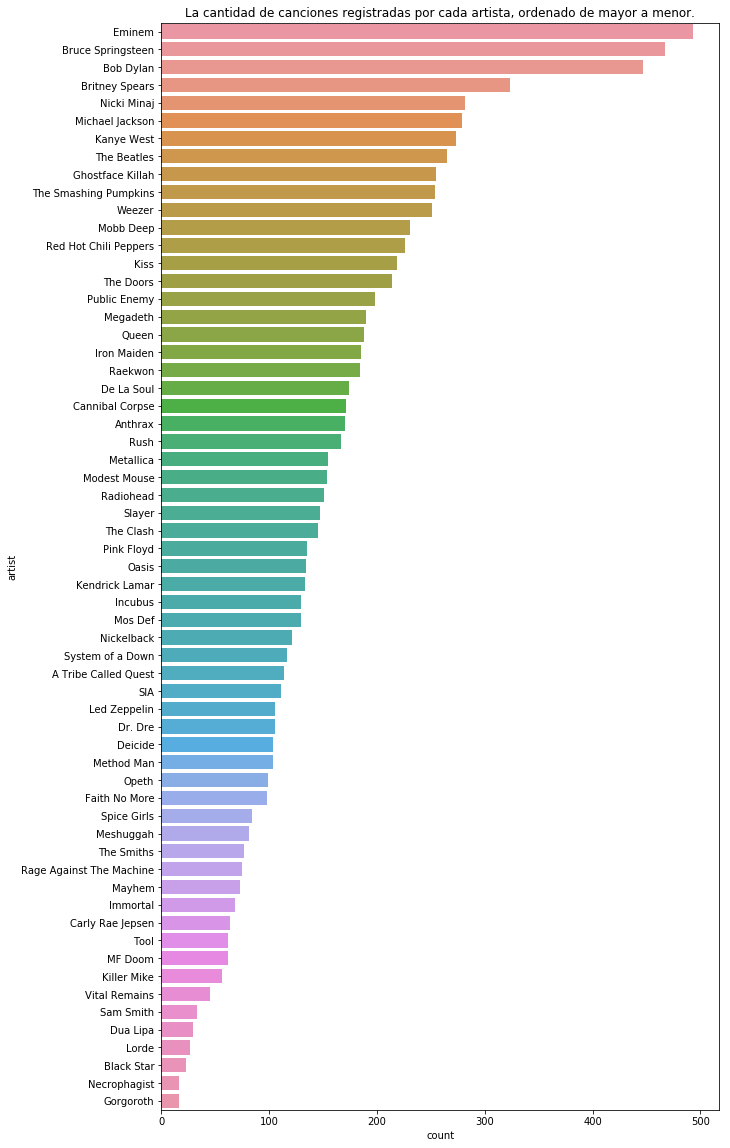

In [53]:
plt.figure(figsize=(10,20))
plt.title('La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.')
ax = sns.countplot(y="artist", data=df, order = df['artist'].value_counts().index)



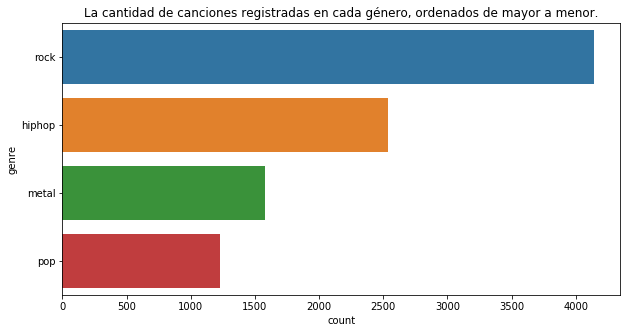

In [56]:
plt.figure(figsize=(10,5))
plt.title('La cantidad de canciones registradas en cada género, ordenados de mayor a menor.')
ax = sns.countplot(y="genre", data=df, order = df['genre'].value_counts().index)



- Rock es es género más común en la base de datos y Pop el menos
- Algunos artistas tienen alta participación en su género

### Desafío 3: Matriz de ocurrencias
- Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?
- Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
- Genere una función que replique el procedimiento para cada uno de los géneros.
- Comente sobre las principales características de cada género en cuanto a sus palabras

In [10]:
cv = CountVectorizer(stop_words='english')

El objetivo de CountVectorizer genera una matriz dispersa con los token de un texto

In [11]:
cv_fit = cv.fit_transform(df['lyrics'])

In [12]:
# Extraer tokers del corpus
cv.get_feature_names()

['00',
 '000',
 '007',
 '01',
 '019',
 '02',
 '0281',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0hio',
 '0migos',
 '10',
 '100',
 '1000',
 '1000000x',
 '1001',
 '100k',
 '101',
 '10128',
 '102',
 '103',
 '10304',
 '10473',
 '105',
 '106',
 '106th',
 '109',
 '10k',
 '10s',
 '10th',
 '10x',
 '11',
 '110',
 '1100',
 '110th',
 '112',
 '11206',
 '118',
 '119',
 '11am',
 '11s',
 '11th',
 '12',
 '120',
 '123',
 '125',
 '125th',
 '129',
 '12p',
 '12pm',
 '12th',
 '12x',
 '13',
 '130',
 '1345',
 '135',
 '13th',
 '13x',
 '14',
 '140',
 '147',
 '14k',
 '14th',
 '15',
 '150',
 '151',
 '1555',
 '15th',
 '16',
 '160',
 '16s',
 '16th',
 '16x',
 '17',
 '1747',
 '175',
 '1792',
 '17th',
 '18',
 '180',
 '1800',
 '1801',
 '182',
 '1831',
 '186',
 '187',
 '1873',
 '1877',
 '187um',
 '18th',
 '19',
 '190',
 '1902',
 '1907',
 '1910',
 '192',
 '1928',
 '1930s',
 '1933',
 '1950',
 '1953',
 '1954',
 '1958',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '197

In [13]:
words = cv.get_feature_names()

In [14]:
words_freq = cv_fit.toarray().sum(axis=0)

In [15]:
words_df = pd.DataFrame({'words': words, 'freq': words_freq})

In [16]:
words_df.sort_values(by = 'freq', ascending=False)

,freq,words
24950,19629,like
12859,17398,don
23856,14962,know
18439,14171,got
23287,13978,just
25479,11268,love
48591,11071,yeah
25165,10028,ll
29851,9879,oh
7009,8356,cause


In [62]:
def words_df(df, genre):
    df_genre = df[df['genre'] == genre]
    cv_fit = cv.fit_transform(df_genre['lyrics'])
    words = cv.get_feature_names()
    words_freq = cv_fit.toarray().sum(axis=0)
    words_df = pd.DataFrame({'words': words, 'freq': words_freq})
    words_df = words_df.sort_values(by = 'freq', ascending=False)
    words_df_100 = words_df[:100]
    
    plt.title(genre)
    sns.barplot(x="freq", y="words", data=words_df_100)
    return words_df

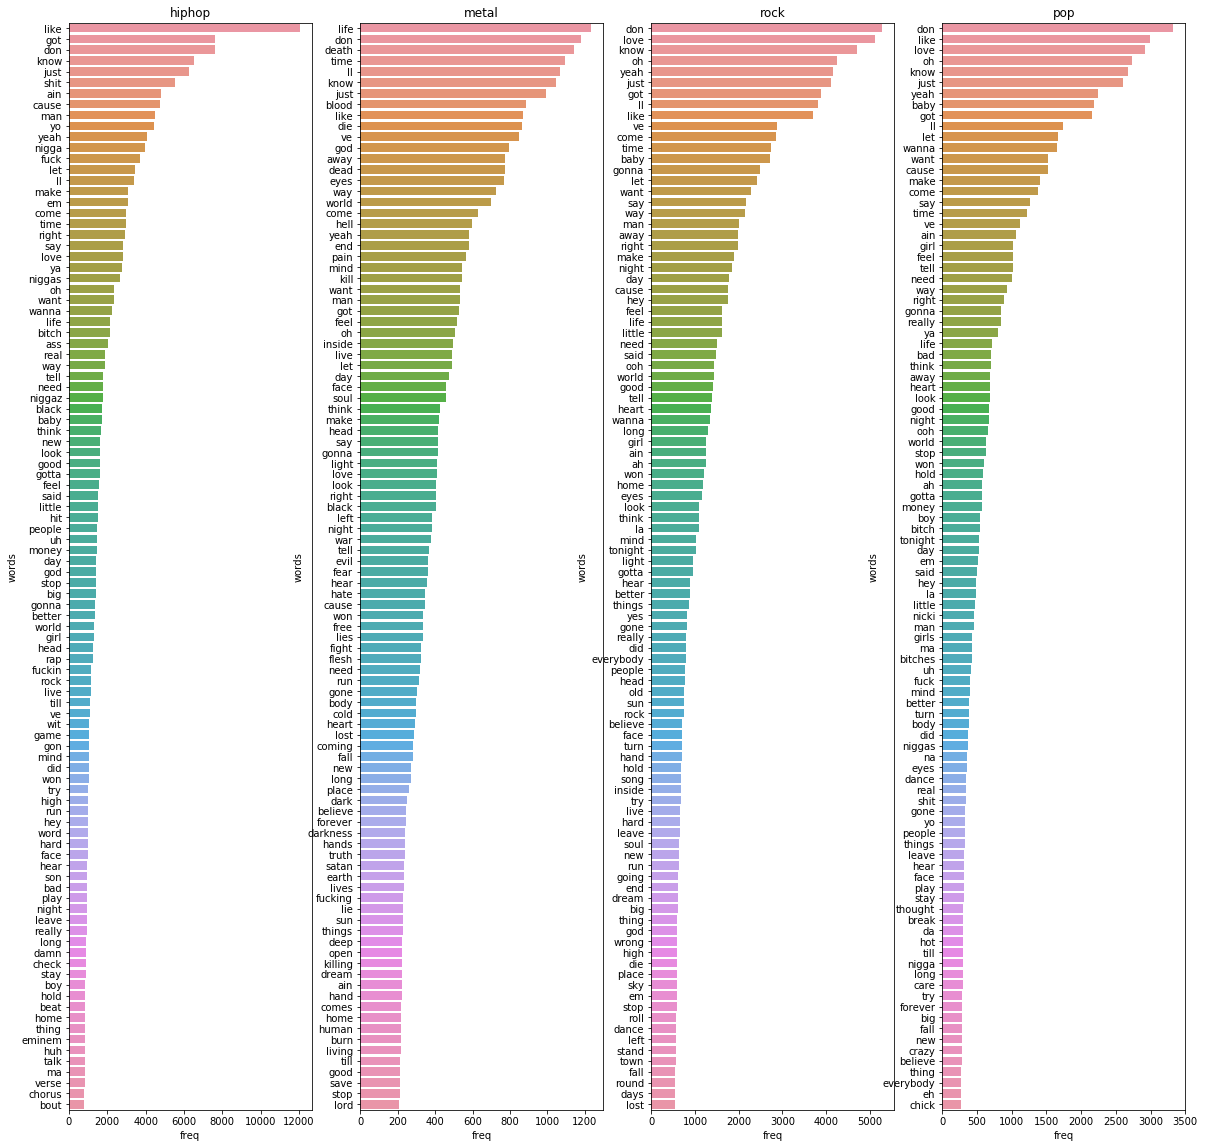

In [66]:
plt.figure(figsize=(20,20))
for i, val in enumerate(df['genre'].unique()):
    plt.subplot(1,4,i+1)
    words_df(df, val);

- Ciertas palabras son comunes en todos los géneros. Estas son las de uso común en inglés como `don`, `like`, `know`
- Hiphop y Metal usan vocabulario más agresivo. El metal se caracteriza por temas relacionados con la vida/muerte y el hiphop respecto a insultar
- Pop y rock son similares.

### Desafío 4: Entrenamiento del Modelo
- Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y classification_report .
- Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
- Monte el modelo dentro de un Pipeline , donde el primer paso es implementar CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB .
- A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?
- Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df['lyrics'], df['genre'], test_size=.40,random_state=602)

text_classifier = Pipeline(
    [
        ('vectorizer', CountVectorizer(stop_words='english')),
        ('classifier', MultinomialNB())
    ]
);

text_classifier.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [72]:
text_to_predict = ['I got a place in the underworld', # Brody Dalle - Underworld
                  'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
                  "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
                  'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
                  'Sexual violence doesnt start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
                  "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \
                  build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\
                  You are not deserving, you are not deserving" #Banks - Drowning
                 ]

In [74]:
nb_class_pred = text_classifier.predict(text_to_predict)
print(nb_class_pred)

['rock' 'metal' 'rock' 'hiphop' 'rock']


In [77]:
print(classification_report(y_test, y_hat))

             precision    recall  f1-score   support

     hiphop       0.84      0.92      0.88       992
      metal       0.84      0.70      0.76       660
        pop       0.64      0.39      0.49       489
       rock       0.76      0.86      0.81      1655

avg / total       0.78      0.79      0.78      3796



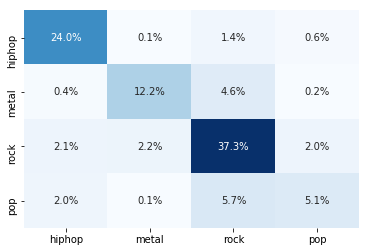

In [92]:
y_hat = text_classifier.predict(X_test)

target_label = df['genre'].unique()
cnf = confusion_matrix(y_test, y_hat, target_label)/len(y_test)
sns.heatmap(cnf, xticklabels=target_label, yticklabels=target_label, annot=True, cmap='Blues', fmt=".1%", cbar=False)

- las mejores predicciones son de Hip Hop
- las peores predicciones son de Pop. Adicionalmente cuenta con un _recall_ bajo, falla en predicir verdaderos al confundir con rock
- En general Rock y Metal también tienen buenos resultados. 

## Desafío 5: Mejora del Modelo
- Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
- Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
- Comente sobre el desempeño general de éste.

Para mejorar el modelo debemos incluir más registros de canciones Pop

In [90]:
df2 = agregar(folder_path='dump_plus_pop', extension='.csv')

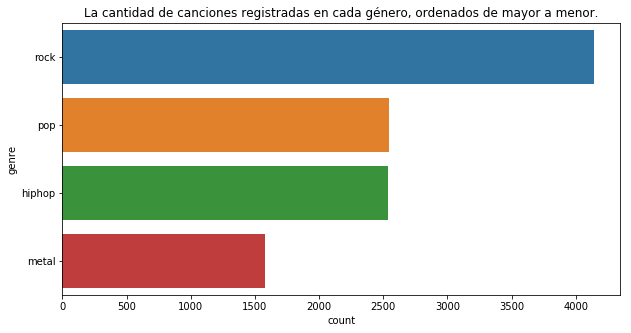

In [96]:
plt.figure(figsize=(10,5))
plt.title('La cantidad de canciones registradas en cada género, ordenados de mayor a menor.')
ax = sns.countplot(y="genre", data=df2, order = df2['genre'].value_counts().index)



             precision    recall  f1-score   support

     hiphop       0.84      0.90      0.87      1042
      metal       0.84      0.70      0.76       606
        pop       0.66      0.65      0.66      1024
       rock       0.74      0.76      0.75      1650

avg / total       0.76      0.76      0.76      4322



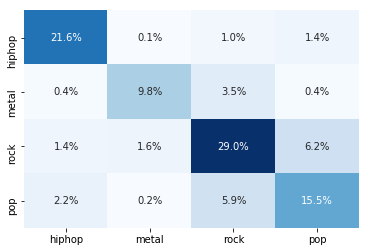

In [95]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df2['lyrics'], df2['genre'], test_size=.40,random_state=602)

text_classifier.fit(X_train_2, y_train_2)

y_hat_2 = text_classifier.predict(X_test_2)


print(classification_report(y_test_2, y_hat_2))

cnf_2 = confusion_matrix(y_test_2, y_hat_2, target_label)/len(y_test_2)
sns.heatmap(cnf_2, xticklabels=target_label, yticklabels=target_label, annot=True, cmap='Blues', fmt=".1%", cbar=False)

- Pop sigue siendo el género con peor clasificación, pero mejoró respecto al primero modelo
- Principalmente mejoró en identificar positivamente los casos verdaderos